In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
from datetime import datetime
import time 

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [7]:
# Build basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i > 50):
        set_count+=1
        record_count=1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | praia
Processing Record 2 of Set 12 | farah
Processing Record 3 of Set 12 | faanui
Processing Record 4 of Set 12 | thaba-tseka
Processing Record 5 of Set 12 | clyde river
Processing Record 6 of Set 12 | atuona
Processing Record 7 of Set 12 | dumai
Processing Record 8 of Set 12 | punta arenas
Processing Record 9 of Set 12 | kapaa
Processing Record 10 of Set 12 | port blair
Processing Record 11 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 12 | umm kaddadah
Processing Record 13 of Set 12 | ushuaia
Processing Record 14 of Set 12 | hermanus
Processing Record 15 of Set 12 | qaanaaq
Processing Record 16 of Set 12 | hilo
Processing Record 17 of Set 12 | rikitea
Processing Record 18 of Set 12 | saint-philippe
Processing Record 19 of Set 12 | mar del plata
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | khatanga
Processing Record

Processing Record 34 of Set 15 | belushya guba
City not found. Skipping...
Processing Record 35 of Set 15 | mumford
Processing Record 36 of Set 15 | yaguajay
Processing Record 37 of Set 15 | naze
Processing Record 38 of Set 15 | ryki
Processing Record 39 of Set 15 | krasnoyarsk-66
City not found. Skipping...
Processing Record 40 of Set 15 | oil city
Processing Record 41 of Set 15 | yumen
Processing Record 42 of Set 15 | husavik
Processing Record 43 of Set 15 | zhigansk
Processing Record 44 of Set 15 | cibitoke
Processing Record 45 of Set 15 | yulara
Processing Record 46 of Set 15 | portland
Processing Record 47 of Set 15 | pangai
Processing Record 48 of Set 15 | ruteng
Processing Record 49 of Set 15 | steinbach
Processing Record 50 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 16 | kropotkin
Processing Record 2 of Set 16 | ntcheu
Processing Record 3 of Set 16 | udagamandalam
Processing Record 4 of Set 16 | el badari
City not found. Skipping...
Processin

Processing Record 18 of Set 19 | nome
Processing Record 19 of Set 19 | atar
Processing Record 20 of Set 19 | dikson
Processing Record 21 of Set 19 | chuy
Processing Record 22 of Set 19 | ambilobe
Processing Record 23 of Set 19 | sao filipe
Processing Record 24 of Set 19 | kamenskoye
City not found. Skipping...
Processing Record 25 of Set 19 | gwanda
Processing Record 26 of Set 19 | kruisfontein
Processing Record 27 of Set 19 | antissa
City not found. Skipping...
Processing Record 28 of Set 19 | yuzhno-kurilsk
Processing Record 29 of Set 19 | junnar
Processing Record 30 of Set 19 | paradwip
City not found. Skipping...
Processing Record 31 of Set 19 | qeshm
Processing Record 32 of Set 19 | sumbawa
City not found. Skipping...
Processing Record 33 of Set 19 | lagoa
Processing Record 34 of Set 19 | guadalupe y calvo
Processing Record 35 of Set 19 | tromso
Processing Record 36 of Set 19 | zunyi
Processing Record 37 of Set 19 | iaciara
Processing Record 38 of Set 19 | kolokani
Processing Reco

Processing Record 6 of Set 23 | naliya
Processing Record 7 of Set 23 | muroto
Processing Record 8 of Set 23 | ambodifototra
City not found. Skipping...
Processing Record 9 of Set 23 | beyneu
Processing Record 10 of Set 23 | tonj
Processing Record 11 of Set 23 | inyonga
Processing Record 12 of Set 23 | parras
City not found. Skipping...
Processing Record 13 of Set 23 | hillsborough
Processing Record 14 of Set 23 | egvekinot
Processing Record 15 of Set 23 | mahajanga
Processing Record 16 of Set 23 | bayan
Processing Record 17 of Set 23 | polunochnoye
Processing Record 18 of Set 23 | hualmay
Processing Record 19 of Set 23 | katsuura
Processing Record 20 of Set 23 | cabedelo
Processing Record 21 of Set 23 | zhicheng
Processing Record 22 of Set 23 | salamiyah
Processing Record 23 of Set 23 | sedan
Processing Record 24 of Set 23 | saveh
Processing Record 25 of Set 23 | tynda
Processing Record 26 of Set 23 | talnakh
Processing Record 27 of Set 23 | abadan
Processing Record 28 of Set 23 | guha

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia,14.9215,-23.5087,75.74,53,20,10.36,CV,2021-12-30 21:32:17
1,Farah,32.5000,62.5000,49.66,35,100,3.49,AF,2021-12-30 21:32:18
2,Faanui,-16.4833,-151.7500,81.57,72,34,18.50,PF,2021-12-30 21:32:18
3,Thaba-Tseka,-29.5220,28.6084,54.09,58,21,0.98,LS,2021-12-30 21:32:18
4,Clyde River,70.4692,-68.5914,-18.17,83,75,10.36,CA,2021-12-30 21:32:19
5,Atuona,-9.8000,-139.0333,79.14,74,16,18.92,PF,2021-12-30 21:32:19
6,Dumai,1.6833,101.4500,73.63,98,98,3.15,ID,2021-12-30 21:32:20
7,Punta Arenas,-53.1500,-70.9167,57.31,47,75,19.57,CL,2021-12-30 21:30:50
8,Kapaa,22.0752,-159.3190,76.98,85,90,5.01,US,2021-12-30 21:32:20
9,Port Blair,11.6667,92.7500,81.16,77,0,13.96,IN,2021-12-30 21:32:21


In [10]:
# Reorder columns in city_data dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Praia,CV,2021-12-30 21:32:17,14.9215,-23.5087,75.74,53,20,10.36
1,Farah,AF,2021-12-30 21:32:18,32.5000,62.5000,49.66,35,100,3.49
2,Faanui,PF,2021-12-30 21:32:18,-16.4833,-151.7500,81.57,72,34,18.50
3,Thaba-Tseka,LS,2021-12-30 21:32:18,-29.5220,28.6084,54.09,58,21,0.98
4,Clyde River,CA,2021-12-30 21:32:19,70.4692,-68.5914,-18.17,83,75,10.36
...,...,...,...,...,...,...,...,...,...
589,Ugoofaaru,MV,2021-12-30 21:48:25,5.6667,73.0000,80.78,75,18,14.16
590,Barbastro,ES,2021-12-30 21:48:25,42.0356,0.1269,57.78,66,7,4.05
591,Goderich,CA,2021-12-30 21:45:35,43.7501,-81.7165,34.92,69,93,3.44
592,Lincoln,US,2021-12-30 21:48:13,40.8000,-96.6670,43.34,44,1,3.00


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

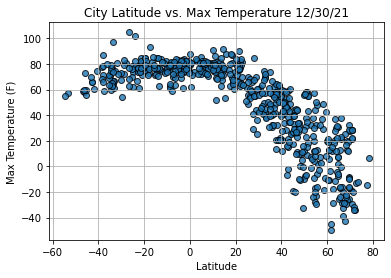

In [14]:
# Create the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Add graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save graph.
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

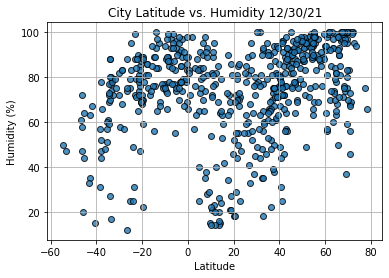

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

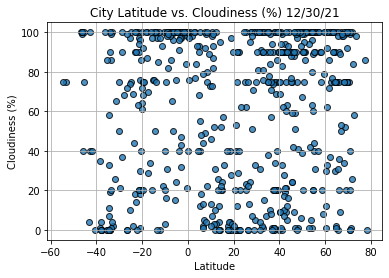

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

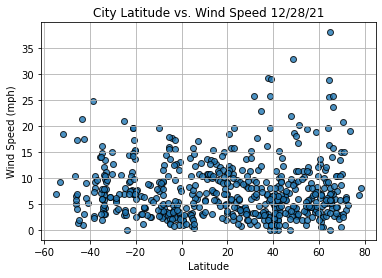

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept 
    # Get the equation of the line.
    line_eq = "y " + str(round(slope,2)) + "x " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitudes')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create northern and souther hemisphere dataframes.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

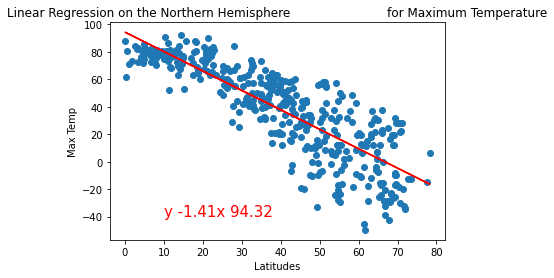

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

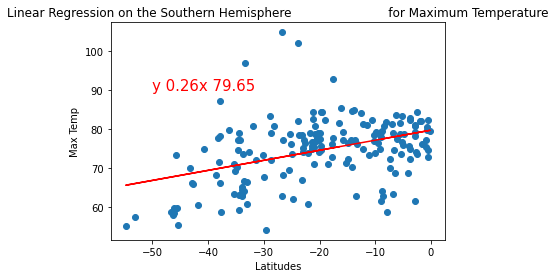

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))